In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [10,6]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('D:\DATA SCIENCE\ARKAVIDIA\GENERAL\Deep Learning class\genap\Housing.csv')


display(df.head())

target = 'price'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Inference: The Datset consists of 13 features & 545 samples.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [5]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 1 numerical & 11 categorical features.


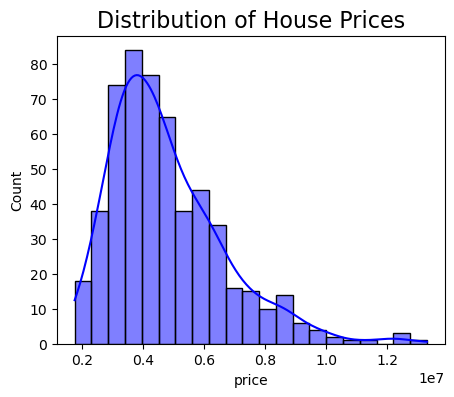

In [6]:
plt.figure(figsize=(5,4))
sns.histplot(df[target], kde=True, color='blue')
plt.title('Distribution of House Prices', fontsize=16)
plt.show()

                               Visualising Categorical Features:                                


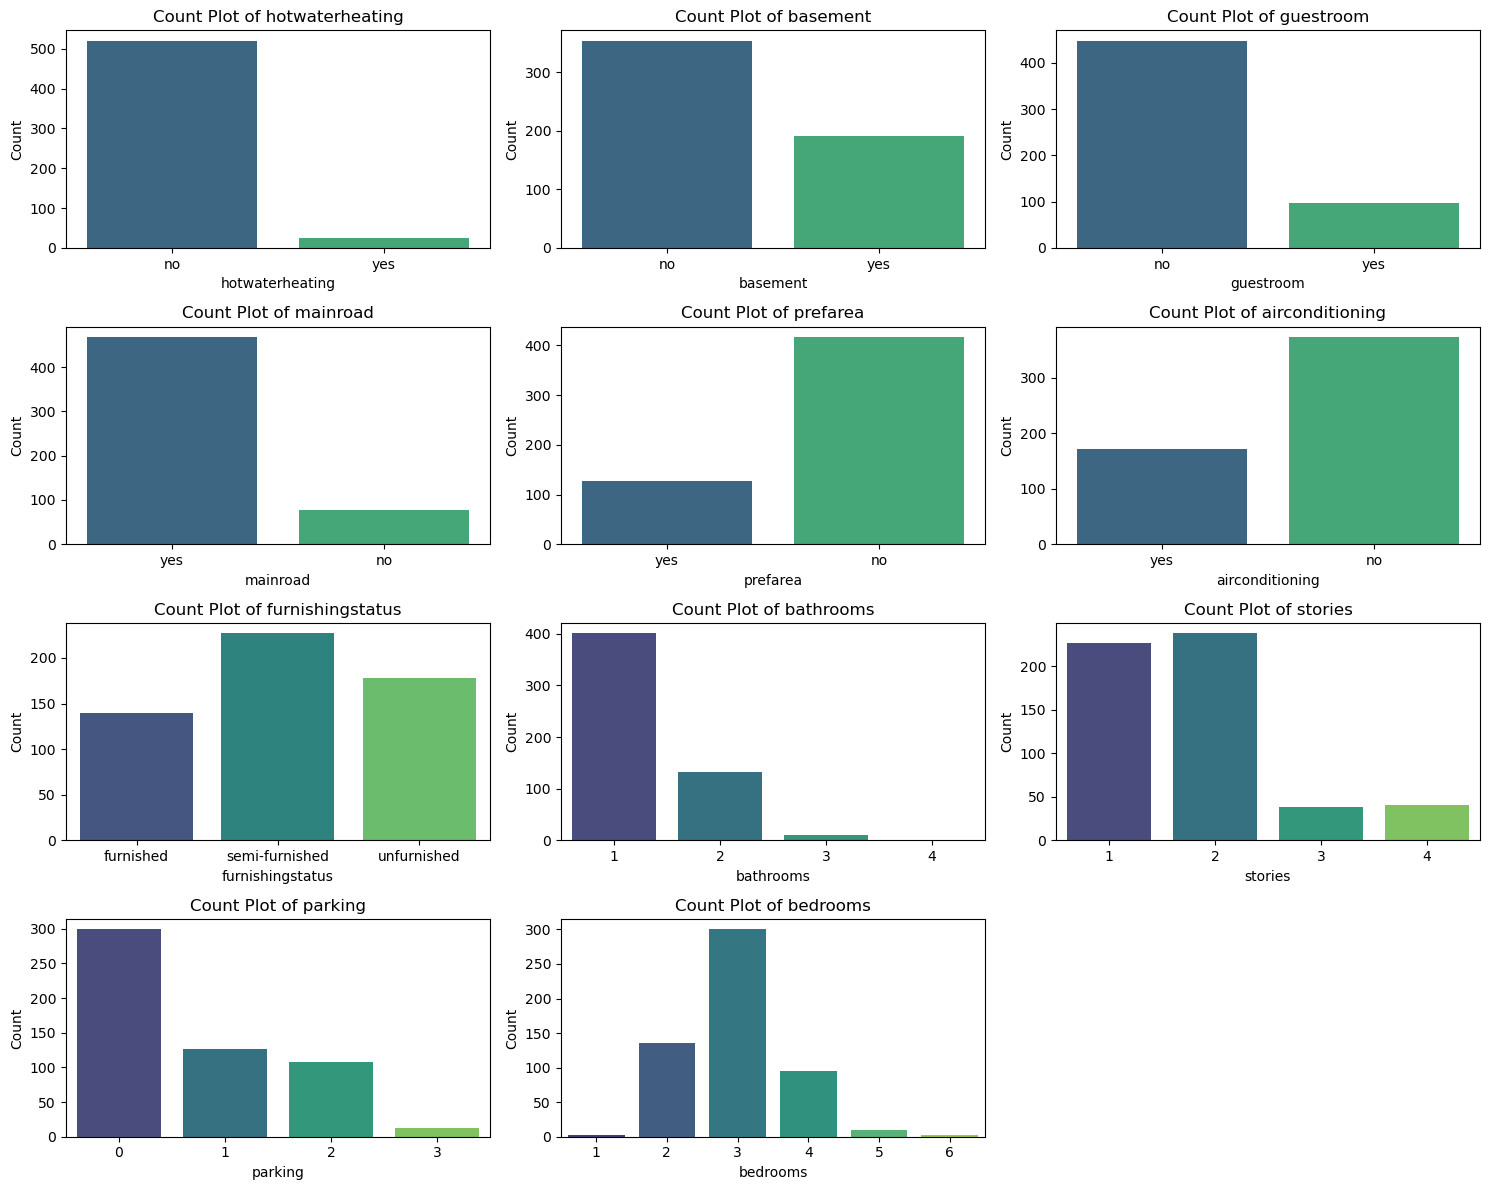

In [7]:
print('\033[1mVisualising Categorical Features:'.center(100))

n = 3
nrows = (len(cf) + n - 1) // n  

plt.figure(figsize=[15, 3 * nrows])

for i, col in enumerate(cf):
    plt.subplot(nrows, n, i + 1)
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


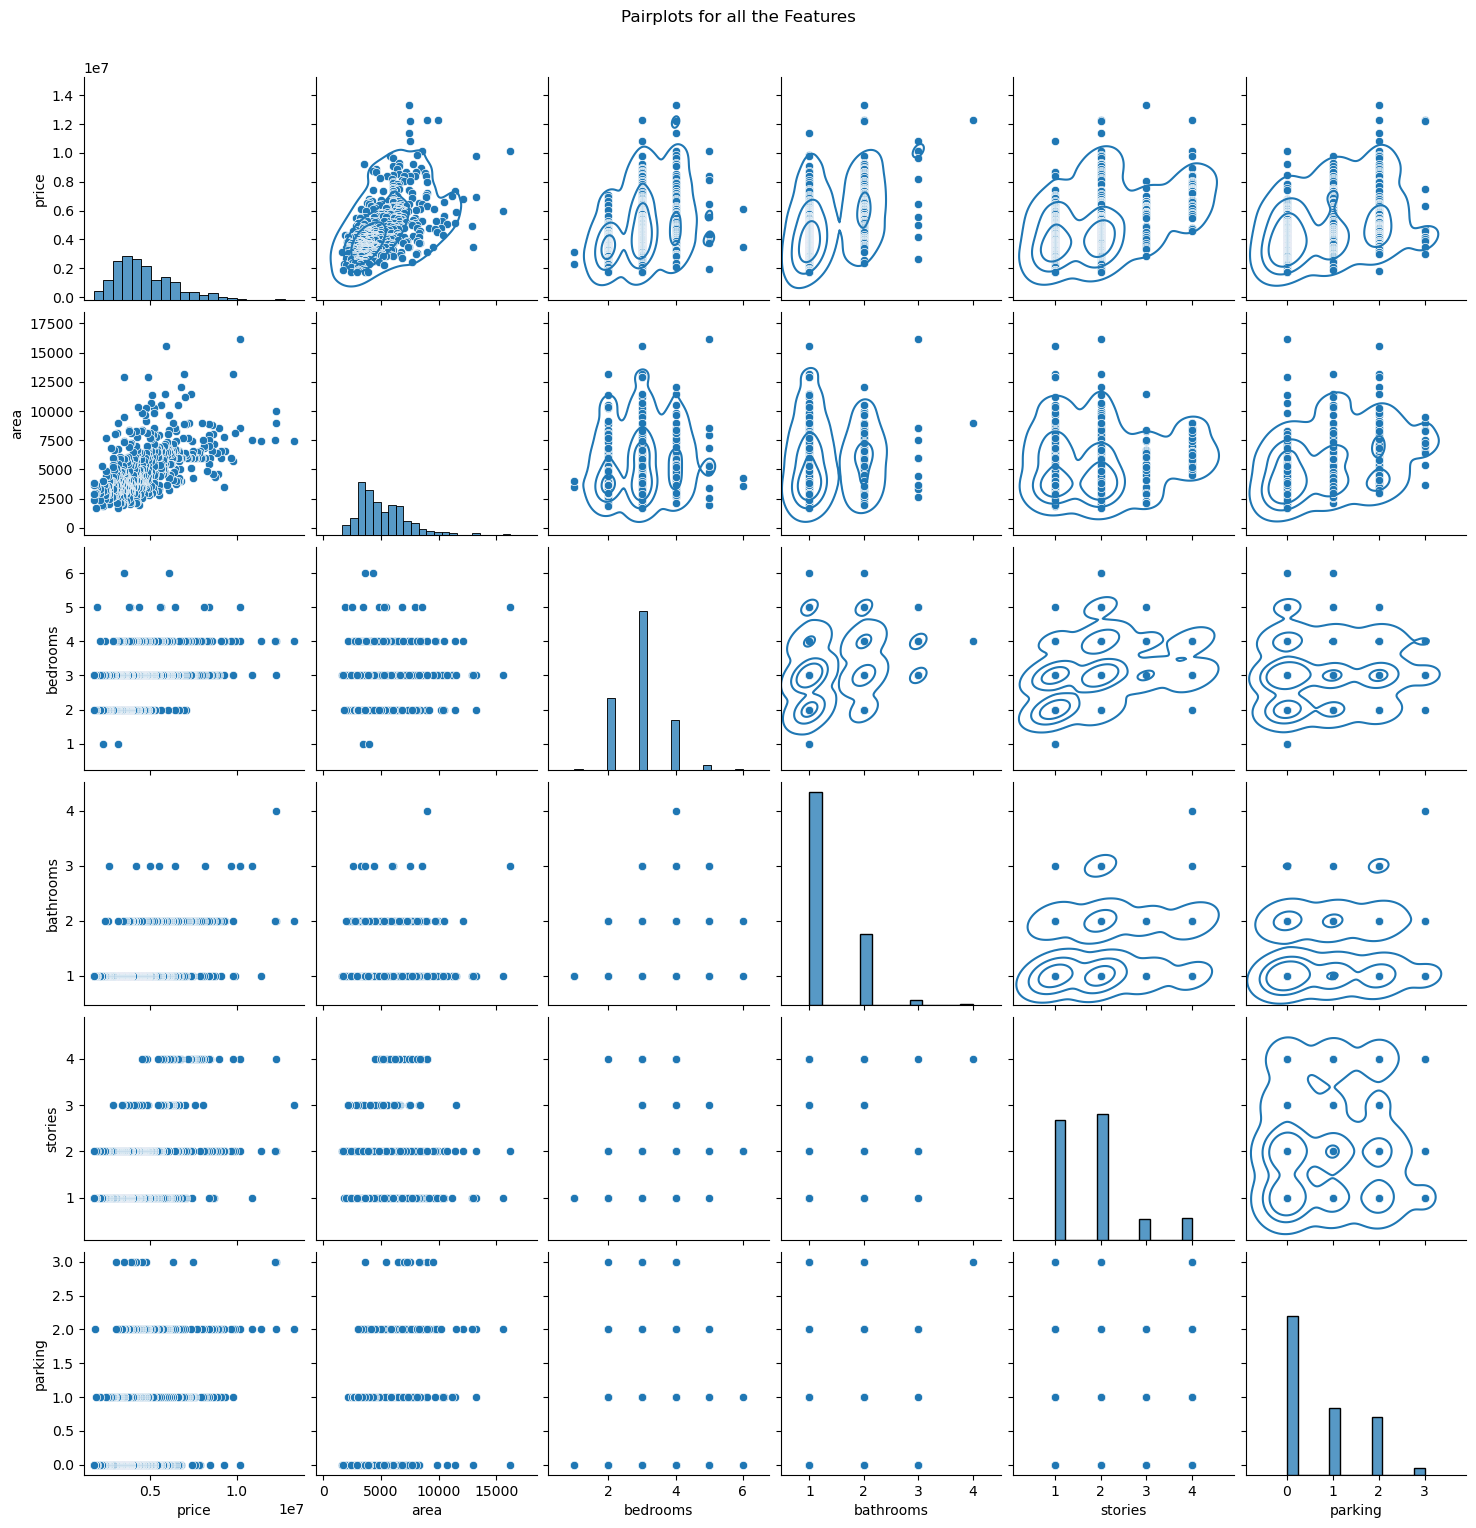

In [8]:
g = sns.pairplot(df)
plt.suptitle('Pairplots for all the Features', y=1.02)
g.map_upper(sns.kdeplot, levels=4)
plt.show()

In [11]:
features1 = nf

for i in features1:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[i] <= (Q3+(1.5*IQR))]
    df = df[df[i] >= (Q1-(1.5*IQR))]
    df = df.reset_index(drop=True)
display(df.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df.shape[0]))


df_processed = df.copy()


for col in cf:
    if df_processed[col].nunique() == 2:
        # Binary → 0/1
        df_processed[col] = df_processed[col].map({df_processed[col].unique()[0]:0,
                                                    df_processed[col].unique()[1]:1})
        print(f"Binary encoding: {col}")
    elif df_processed[col].nunique() > 2:
        # Multi-class → One-Hot encoding as 0/1
        dummies = pd.get_dummies(df_processed[col], drop_first=True, prefix=col)
        dummies = dummies.astype(int)
        df_processed = pd.concat([df_processed.drop(col, axis=1), dummies], axis=1)
        print(f"One-Hot encoding: {col}")


print("\nShape after encoding:", df_processed.shape)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Inference:
Before removal of outliers, The dataset had 530 samples.
After removal of outliers, The dataset now has 530 samples.
Binary encoding: hotwaterheating
Binary encoding: basement
Binary encoding: guestroom
Binary encoding: mainroad
Binary encoding: prefarea
Binary encoding: airconditioning
One-Hot encoding: furnishingstatus
One-Hot encoding: bathrooms
One-Hot encoding: stories
One-Hot encoding: parking
One-Hot encoding: bedrooms

Shape after encoding: (530, 24)


In [12]:
# ==============================
# Feature Engineering / Merging
# ==============================



# 1️⃣ Bathrooms
bath_cols = ['bathrooms_2', 'bathrooms_3', 'bathrooms_4']
df_processed['bathrooms'] = 2*df_processed['bathrooms_2'] + 3*df_processed['bathrooms_3'] + 4*df_processed['bathrooms_4']
df_processed.drop(bath_cols, axis=1, inplace=True)

# 2️⃣ Stories
stories_cols = ['stories_2', 'stories_3', 'stories_4']
df_processed['stories'] = 2*df_processed['stories_2'] + 3*df_processed['stories_3'] + 4*df_processed['stories_4']
df_processed.drop(stories_cols, axis=1, inplace=True)

# 3️⃣ Parking
parking_cols = ['parking_1', 'parking_2', 'parking_3']
df_processed['parking'] = 1*df_processed['parking_1'] + 2*df_processed['parking_2'] + 3*df_processed['parking_3']
df_processed.drop(parking_cols, axis=1, inplace=True)

# 4️⃣ Bedrooms
bed_cols = ['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6']
df_processed['bedrooms'] = (2*df_processed['bedrooms_2'] + 3*df_processed['bedrooms_3'] +
                            4*df_processed['bedrooms_4'] + 5*df_processed['bedrooms_5'] +
                            6*df_processed['bedrooms_6'])
df_processed.drop(bed_cols, axis=1, inplace=True)

df_processed['furnishingstatus'] = (
    0*df_processed.get('furnishingstatus_unfurnished', 0) +
    1*df_processed.get('furnishingstatus_semi-furnished', 0) +
    2*df_processed.get('furnishingstatus_furnished', 0)
)

# Drop the one-hot columns after merging
df_processed.drop(['furnishingstatus_unfurnished', 
                   'furnishingstatus_semi-furnished', 
                   'furnishingstatus_furnished'], 
                  axis=1, inplace=True, errors='ignore')


print("Shape after feature merging:", df_processed.shape)

df_processed['bed_bath_ratio'] = df_processed['bedrooms'] / df_processed['bathrooms'].replace(0, 1)

df_processed['parking_area_ratio'] = df_processed['parking'] / df_processed['area'].replace(0,1)

df_processed['num_rooms'] = df_processed['bedrooms'] + df_processed['bathrooms']


Shape after feature merging: (530, 13)


In [13]:
df_processed.sample(4)

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bathrooms,stories,parking,bedrooms,furnishingstatus,bed_bath_ratio,parking_area_ratio,num_rooms
89,6300000,9000,0,0,1,0,1,0,0,0,1,3,0,3.0,0.000111,3
320,3920000,3290,0,0,0,1,1,1,0,0,1,2,0,2.0,0.000304,2
74,6629000,6000,0,0,0,1,1,0,0,2,1,3,1,3.0,0.000167,3
412,3332000,2145,0,0,1,0,1,0,0,2,0,3,0,3.0,0.000000,3


                                       Correlation Matrix                                       


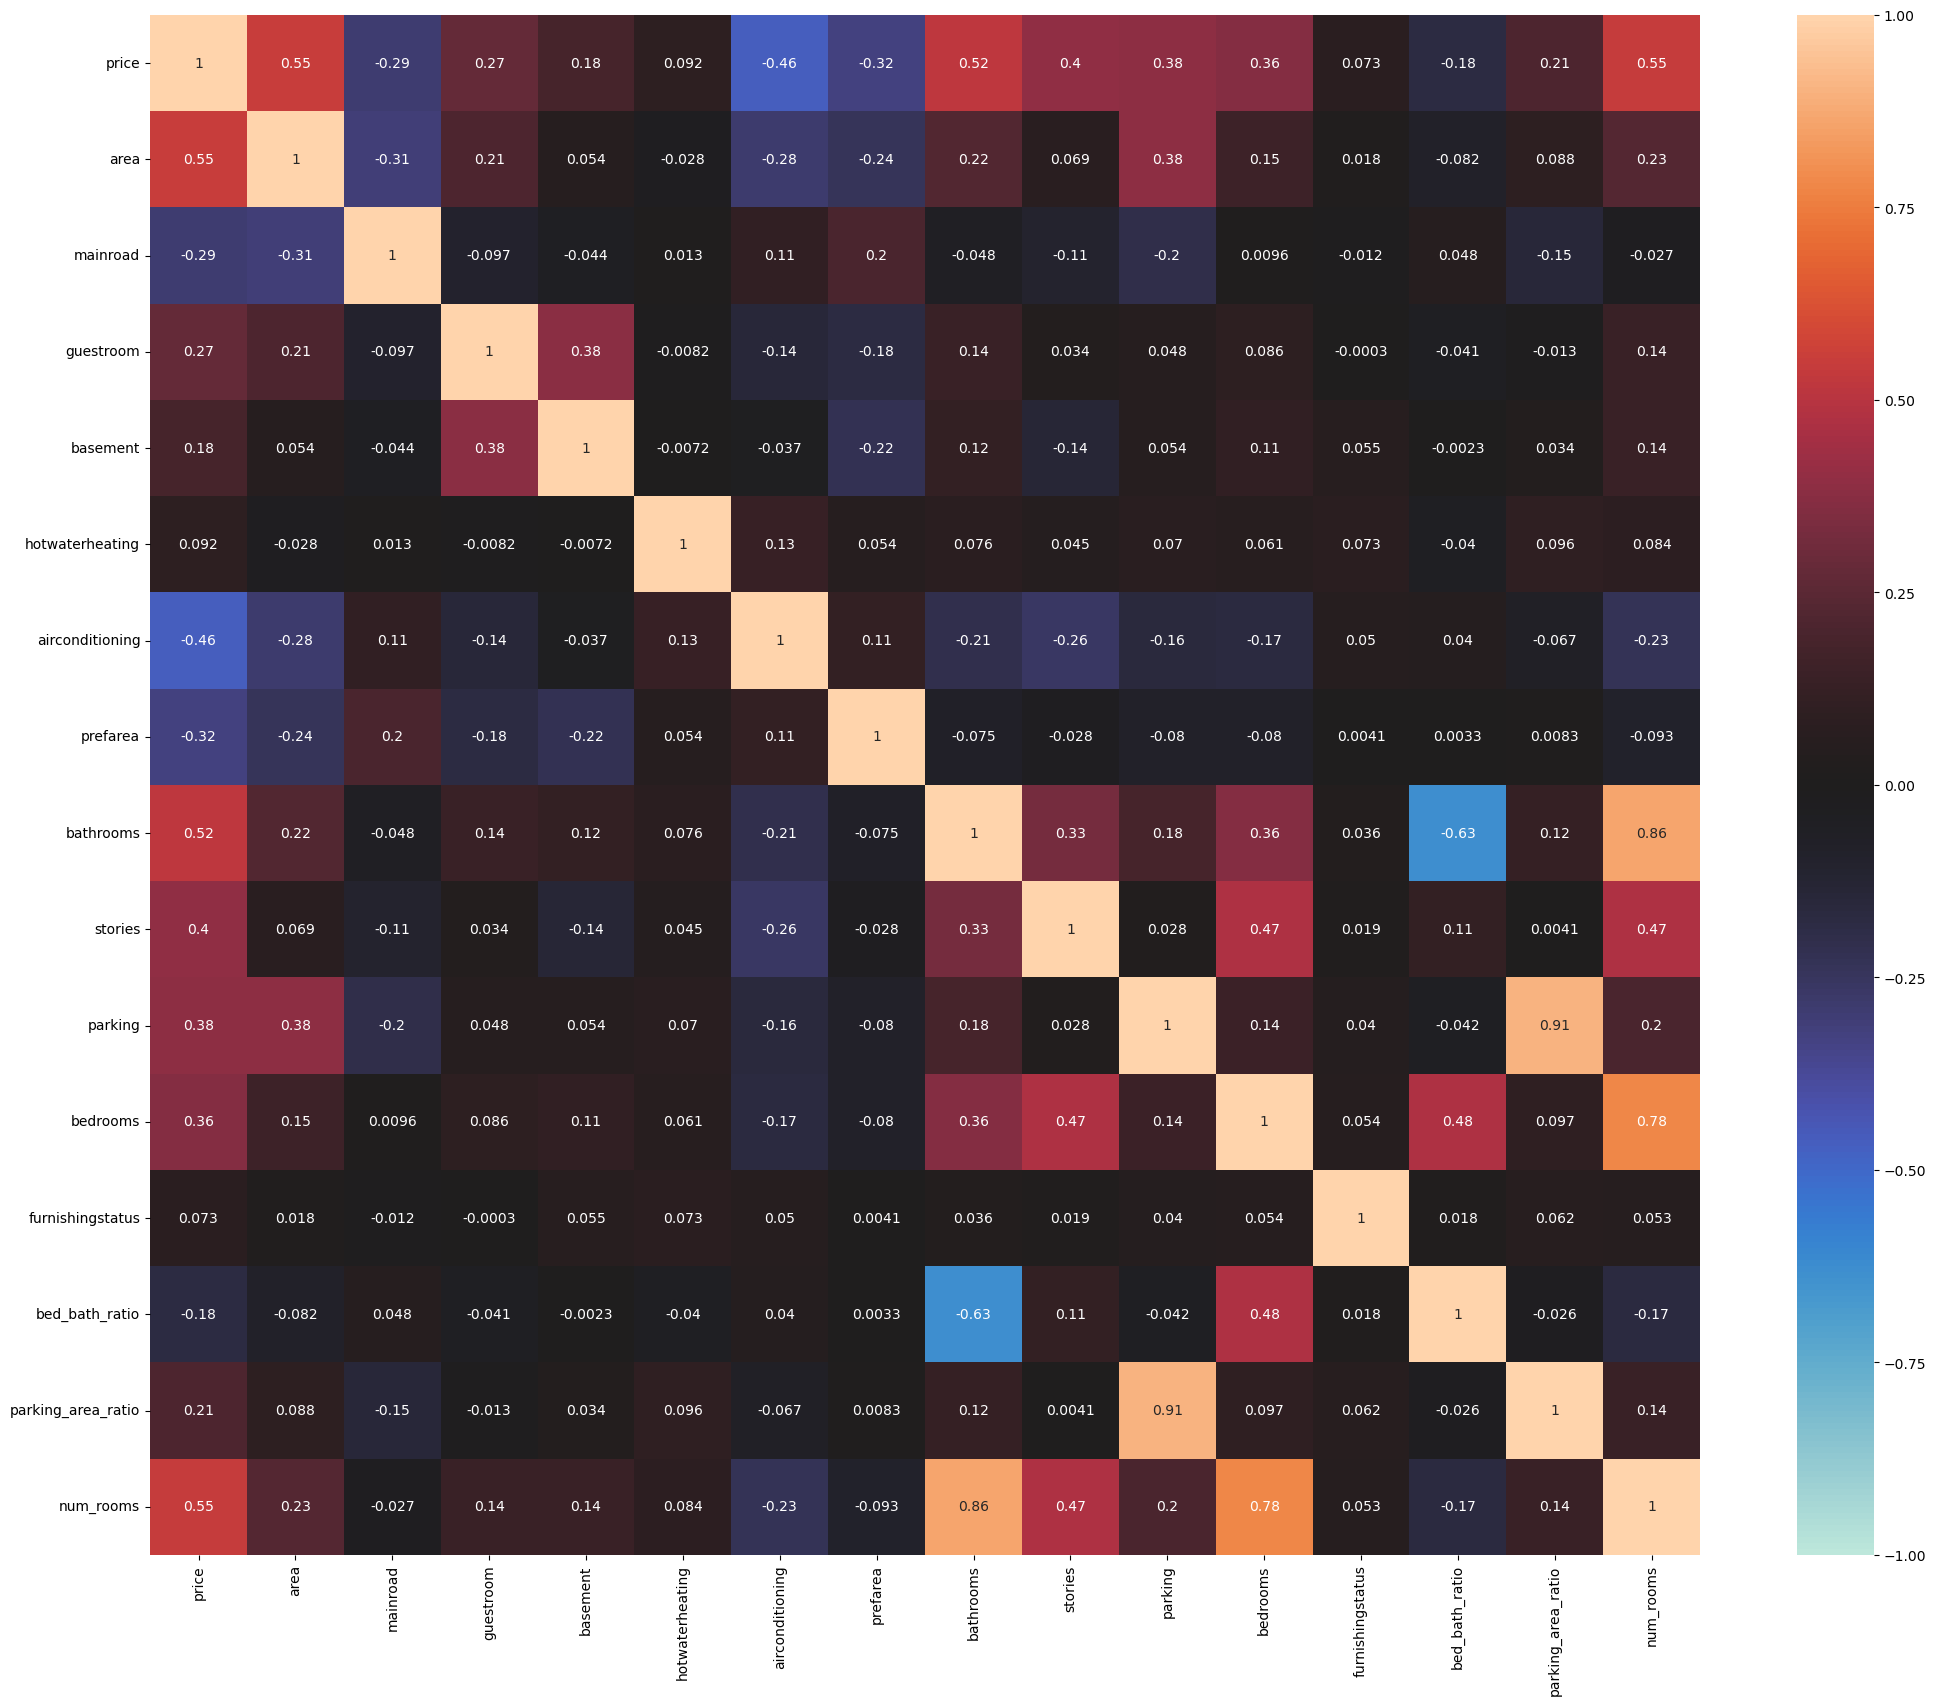

In [14]:
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df_processed.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [15]:
m=[]
for i in df_processed.columns.values:
    m.append(i.replace(' ','_'))
    
df_processed.columns = m
X = df_processed.drop([target],axis=1)
Y = df_processed[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (530, 15) (530,) 
Training set  --->  (424, 15) (424,) 
Testing set   --->  (106, 15)  (106,)


In [16]:

scaler = MinMaxScaler()

print('\033[1mNormalization on Training set'.center(120))
Train_X_norm = scaler.fit_transform(Train_X)
Train_X_norm = pd.DataFrame(Train_X_norm, columns=X.columns)
display(Train_X_norm.describe())

print('\n', '\033[1mNormalization on Testing set'.center(120))
Test_X_norm = scaler.transform(Test_X)
Test_X_norm = pd.DataFrame(Test_X_norm, columns=X.columns)
display(Test_X_norm.describe())

                                           Normalization on Training set                                            


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bathrooms,stories,parking,bedrooms,furnishingstatus,bed_bath_ratio,parking_area_ratio,num_rooms
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.376958,0.139151,0.179245,0.351415,0.047170,0.688679,0.792453,0.142099,0.354953,0.227987,0.494497,0.429245,0.415160,0.161623,0.441922
std,0.207702,0.346513,0.384011,0.477976,0.212252,0.463581,0.406030,0.235080,0.317271,0.287947,0.128523,0.495553,0.139064,0.216190,0.175673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.216418,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.375000
50%,0.327210,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.333333,0.000000,0.375000
75%,0.527382,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,0.500000,0.333333,0.500000,1.000000,0.500000,0.299505,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



                                             Normalization on Testing set                                            


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bathrooms,stories,parking,bedrooms,furnishingstatus,bed_bath_ratio,parking_area_ratio,num_rooms
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.386247,0.169811,0.188679,0.339623,0.037736,0.660377,0.688679,0.117925,0.325472,0.226415,0.485849,0.367925,0.418763,0.154338,0.423349
std,0.210900,0.377251,0.393112,0.475831,0.191462,0.475831,0.465233,0.221487,0.350459,0.285624,0.108179,0.484532,0.116263,0.193009,0.164182
min,0.034443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.166667,0.000000,0.250000
25%,0.215270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.333333,0.000000,0.375000
50%,0.359931,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.375000
75%,0.520379,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.500000,0.333333,0.500000,1.000000,0.500000,0.302500,0.500000
max,0.901263,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,0.833333,1.000000,0.666667,0.701449,0.875000


In [18]:

Train_X_norm_np = Train_X_norm.values
Test_X_norm_np = Test_X_norm.values

In [ ]:
# import importlib
# import tugas_nn
# importlib.reload(tugas_nn)
# from tugas_nn import NeuralNetUtils, Dense, NeuralNetwork, Metrics

# # Scale the target variable

# Train_X_norm_np = Train_X_norm.values
# Test_X_norm_np = Test_X_norm.values

# target_scaler = StandardScaler()
# Train_Y_np = target_scaler.fit_transform(Train_Y.values.reshape(-1,1))
# Test_Y_np = target_scaler.transform(Test_Y.values.reshape(-1,1))

# # Train_Y_log = np.log1p(Train_Y.values)  # log1p handles zeros better
# # Test_Y_log = np.log1p(Test_Y.values)

# # Train_Y_log = Train_Y_log.reshape(-1,1)
# # Test_Y_log = Test_Y_log.reshape(-1,1)

# model = NeuralNetwork()

# model.add(Dense(input_dim = Train_X_norm.shape[1], output_dim = 32, activation= 'relu', weight_init='he'))
# model.add(Dense(input_dim = 32, output_dim = 32, activation= 'relu', weight_init='he'))
# model.add(Dense(input_dim = 32, output_dim = 32, activation= 'relu', weight_init='he'))
# model.add(Dense(input_dim = 32, output_dim = 32, activation= 'relu', weight_init='he'))
# model.add(Dense(input_dim = 32, output_dim = 32, activation= 'relu', weight_init='he'))
# model.add(Dense(input_dim = 32, output_dim = 32, activation= 'relu', weight_init='he'))
# model.add(Dense(input_dim = 32, output_dim = 1, activation= 'linear', weight_init='he'))
# # model.add(Dense(input_dim = 32, output_dim = 16, activation= 'relu', weight_init='he'))
# # model.add(Dense(input_dim = 16, output_dim = 1 , activation= 'linear', weight_init='xavier'))

# model.set_loss('mse')

# model.train(Train_X_norm_np, 
#             Train_Y_np, 
#             y_val= Test_Y_np, 
#             X_val=Test_X_norm_np, 
#             epochs=100, 
#             learning_rate=0.0001,
#             batch_size=64, 
#             verbose=True)



In [38]:
# ======================================================
# VISUALISASI TRAINING HISTORY DAN ANALISIS TAMBAHAN
# ======================================================

def visualize_training_history_and_predictions(Train_X_norm_np, Test_X_norm_np, Train_Y, Test_Y, 
                                             best_config=None, use_target_scaling=True):
    """
    Visualisasi training history dan prediksi untuk model terbaik
    """
    
    import importlib
    import tugas_nn
    importlib.reload(tugas_nn)
    from tugas_nn import NeuralNetUtils, Dense, NeuralNetwork, Metrics
    import time
    
    # Gunakan konfigurasi terbaik atau default
    if best_config is None:
        best_config = {
            'activation': 'relu', 
            'loss': 'mae', 
            'lr': 0.001, 
            'architecture': [128, 64], 
            'epochs': 500, 
            'batch_size': 64, 
            'type': 'Mini-batch'
        }
    
    print("\n" + "="*80)
    print("📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI")
    print("="*80)
    print(f"Menggunakan konfigurasi terbaik:")
    print(f"   Architecture: {Train_X_norm_np.shape[1]} -> {' -> '.join(map(str, best_config['architecture']))} -> 1")
    print(f"   Activation: {best_config['activation'].upper()}")
    print(f"   Loss: {best_config['loss'].upper()}")
    print(f"   Learning Rate: {best_config['lr']}")
    print(f"   Batch Size: {best_config['batch_size']}")
    print(f"   Epochs: {best_config['epochs']}")
    print("="*80)
    
    # Prepare data
    if use_target_scaling:
        target_scaler = StandardScaler()
        Train_Y_processed = target_scaler.fit_transform(Train_Y.values.reshape(-1,1))
        Test_Y_processed = target_scaler.transform(Test_Y.values.reshape(-1,1))
    else:
        Train_Y_processed = Train_Y.values.reshape(-1,1)
        Test_Y_processed = Test_Y.values.reshape(-1,1)
        target_scaler = None
    
    # Train model dengan verbose=True untuk mendapatkan history
    model = NeuralNetwork()
    
    # Add layers
    prev_dim = Train_X_norm_np.shape[1]
    for hidden_dim in best_config['architecture']:
        model.add(Dense(input_dim=prev_dim, output_dim=hidden_dim, 
                      activation=best_config['activation'], weight_init='he'))
        prev_dim = hidden_dim
    
    # Output layer
    model.add(Dense(input_dim=prev_dim, output_dim=1, 
                  activation='linear', weight_init='xavier'))
    
    # Set loss function
    model.set_loss(best_config['loss'])
    
    # Train model
    start_time = time.time()
    model.train(Train_X_norm_np, 
               Train_Y_processed, 
               y_val=Test_Y_processed, 
               X_val=Test_X_norm_np, 
               epochs=best_config['epochs'], 
               learning_rate=best_config['lr'],
               batch_size=best_config['batch_size'],
               verbose=True)  # Enable verbose untuk history
    
    training_time = time.time() - start_time
    
    # Make predictions
    predictions_processed = model.predict(Test_X_norm_np)
    train_predictions_processed = model.predict(Train_X_norm_np)
    
    # Transform back to original scale
    if use_target_scaling:
        predictions = target_scaler.inverse_transform(predictions_processed)
        train_predictions = target_scaler.inverse_transform(train_predictions_processed)
        actual_test = target_scaler.inverse_transform(Test_Y_processed)
        actual_train = target_scaler.inverse_transform(Train_Y_processed)
    else:
        predictions = predictions_processed
        train_predictions = train_predictions_processed
        actual_test = Test_Y_processed
        actual_train = Train_Y_processed
    
    # Calculate metrics
    test_r2 = Metrics.r2_score(actual_test, predictions)
    train_r2 = Metrics.r2_score(actual_train, train_predictions)
    test_rmse = np.sqrt(Metrics.mse(actual_test, predictions))
    train_rmse = np.sqrt(Metrics.mse(actual_train, train_predictions))
    
    # Create comprehensive visualizations
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.tight_layout(pad=5.0) # Add padding between plots
    
    # 1. Training History - Loss vs Epoch
    if model.history and len(model.history.get('loss', [])) > 0:
        axes[0].plot(model.history['loss'], label='Training Loss', color='blue', linewidth=2)
        if len(model.history.get('val_loss', [])) > 0:
            axes[0].plot(model.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel(f'Loss ({best_config["loss"].upper()})')
        axes[0].set_title('Training History - Loss vs Epoch')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        axes[0].set_yscale('log')  # Log scale for better visualization
    else:
        axes[0].text(0.5, 0.5, 'No Training History Available', 
                      ha='center', va='center', transform=axes[0].transAxes)
        axes[0].set_title('Training History - Not Available')
    
    # 2. Predictions vs Actual (Test Set)
    axes[1].scatter(actual_test, predictions, alpha=0.6, color='blue', s=30)
    min_val = min(actual_test.min(), predictions.min())
    max_val = max(actual_test.max(), predictions.max())
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    axes[1].set_xlabel('Actual Price')
    axes[1].set_ylabel('Predicted Price')
    axes[1].set_title(f'Test Predictions vs Actual\nR² = {test_r2:.4f}, RMSE = {test_rmse:,.0f}')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # 3. Residuals Plot (Test Set)
    residuals_test = actual_test.flatten() - predictions.flatten()
    axes[2].scatter(predictions, residuals_test, alpha=0.6, color='green', s=30)
    axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[2].set_xlabel('Predicted Price')
    axes[2].set_ylabel('Residuals (Actual - Predicted)')
    axes[2].set_title('Residuals Plot (Test Set)')
    axes[2].grid(True, alpha=0.3)

    plt.show()
    # Print summary
    print(f"\n📊 RINGKASAN HASIL:")
    print(f"   Training Time: {training_time:.2f}s")
    print(f"   Train R²: {train_r2:.4f}")
    print(f"   Test R²: {test_r2:.4f}")
    print(f"   Train RMSE: {train_rmse:,.2f}")
    print(f"   Test RMSE: {test_rmse:,.2f}")
    print(f"   Overfitting Gap: {train_r2 - test_r2:.4f}")
    
    # Performance interpretation
    if test_r2 > 0.8:
        performance = "Excellent 🏆"
    elif test_r2 > 0.7:
        performance = "Good 👍"
    elif test_r2 > 0.6:
        performance = "Acceptable 👌"
    else:
        performance = "Needs Improvement 📈"
    
    print(f"   Performance: {performance}")
    
    return model, {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'training_time': training_time,
        'overfitting_gap': train_r2 - test_r2,
        'history': model.getHistory()
    }



📘 BAB 1 — Perbandingan batch 


🚀 [BAB 1] Batch Type = MINI-BATCH

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: RELU
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 1.008455 | Val Loss: 1.077958 | R²: -0.4375 | MAE: 1.077958
Epoch   51/500 | Loss: 0.825094 | Val Loss: 0.914183 | R²: -0.1517 | MAE: 0.914183
Epoch  101/500 | Loss: 0.758830 | Val Loss: 0.817872 | R²: -0.0493 | MAE: 0.817872
Epoch  151/500 | Loss: 0.722635 | Val Loss: 0.759060 | R²: -0.0158 | MAE: 0.759060
Epoch  201/500 | Loss: 0.697602 | Val Loss: 0.725960 | R²: -0.0023 | MAE: 0.725960
Epoch  251/500 | Loss: 0.708818 | Val Loss: 0.706442 | R²: 0.0095 | MAE: 0.706442
Epoch  301/500 | Loss: 0.663894 | Val Loss: 0.692175 | R²: 0.0254 | MAE: 0.692175
Epoch  351/500 | Loss: 0.688149 | Val Loss: 0.683005 | R²: 0.0466 | MAE: 0.683005
Epoch  401/500 | Loss: 0.648230 | Val Loss: 0.674228 | R²: 0.0660 |

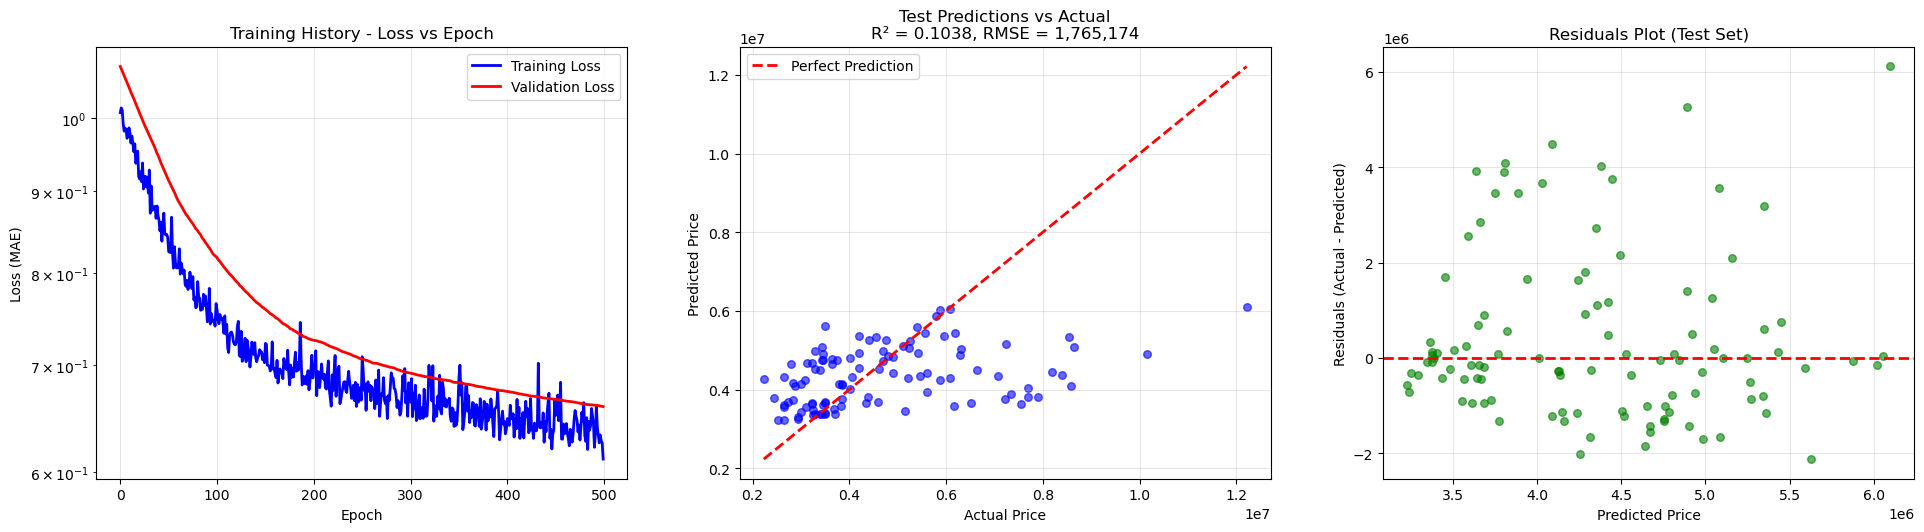


📊 RINGKASAN HASIL:
   Training Time: 4.05s
   Train R²: 0.1469
   Test R²: 0.1038
   Train RMSE: 1,707,761.49
   Test RMSE: 1,765,173.66
   Overfitting Gap: 0.0431
   Performance: Needs Improvement 📈

🚀 [BAB 1] Batch Type = BATCH

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: RELU
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 1.008455 | Val Loss: 1.077958 | R²: -0.4375 | MAE: 1.077958
Epoch   51/500 | Loss: 0.825094 | Val Loss: 0.914183 | R²: -0.1517 | MAE: 0.914183
Epoch  101/500 | Loss: 0.758830 | Val Loss: 0.817872 | R²: -0.0493 | MAE: 0.817872
Epoch  151/500 | Loss: 0.722635 | Val Loss: 0.759060 | R²: -0.0158 | MAE: 0.759060
Epoch  201/500 | Loss: 0.697602 | Val Loss: 0.725960 | R²: -0.0023 | MAE: 0.725960
Epoch  251/500 | Loss: 0.708818 | Val Loss: 0.706442 | R²: 0.0095 | MAE: 0.706442
Epoch  301/500 | Loss: 0.663894 | Val Loss: 0.692175 | R²: 0.0254 |

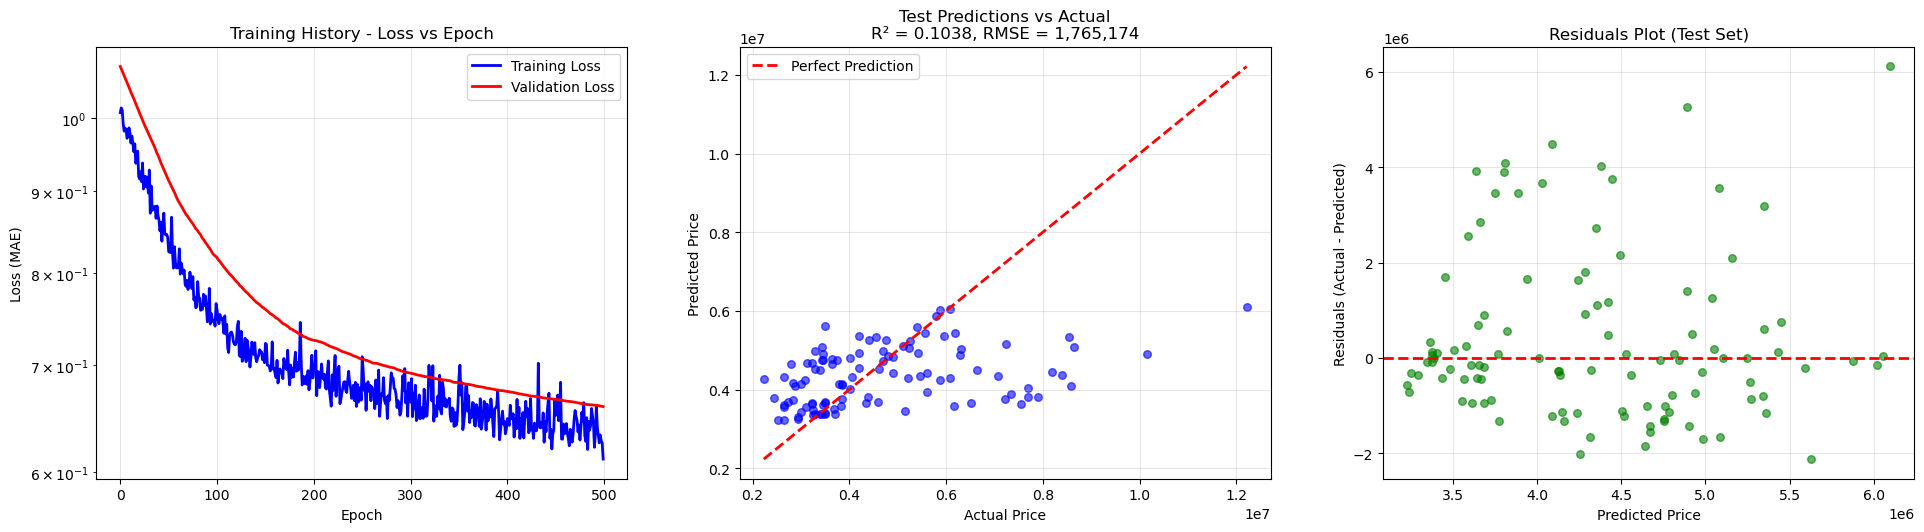


📊 RINGKASAN HASIL:
   Training Time: 3.79s
   Train R²: 0.1469
   Test R²: 0.1038
   Train RMSE: 1,707,761.49
   Test RMSE: 1,765,173.66
   Overfitting Gap: 0.0431
   Performance: Needs Improvement 📈

🚀 [BAB 1] Batch Type = SGD

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: RELU
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 1.008455 | Val Loss: 1.077958 | R²: -0.4375 | MAE: 1.077958
Epoch   51/500 | Loss: 0.825094 | Val Loss: 0.914183 | R²: -0.1517 | MAE: 0.914183
Epoch  101/500 | Loss: 0.758830 | Val Loss: 0.817872 | R²: -0.0493 | MAE: 0.817872
Epoch  151/500 | Loss: 0.722635 | Val Loss: 0.759060 | R²: -0.0158 | MAE: 0.759060
Epoch  201/500 | Loss: 0.697602 | Val Loss: 0.725960 | R²: -0.0023 | MAE: 0.725960
Epoch  251/500 | Loss: 0.708818 | Val Loss: 0.706442 | R²: 0.0095 | MAE: 0.706442
Epoch  301/500 | Loss: 0.663894 | Val Loss: 0.692175 | R²: 0.0254 | M

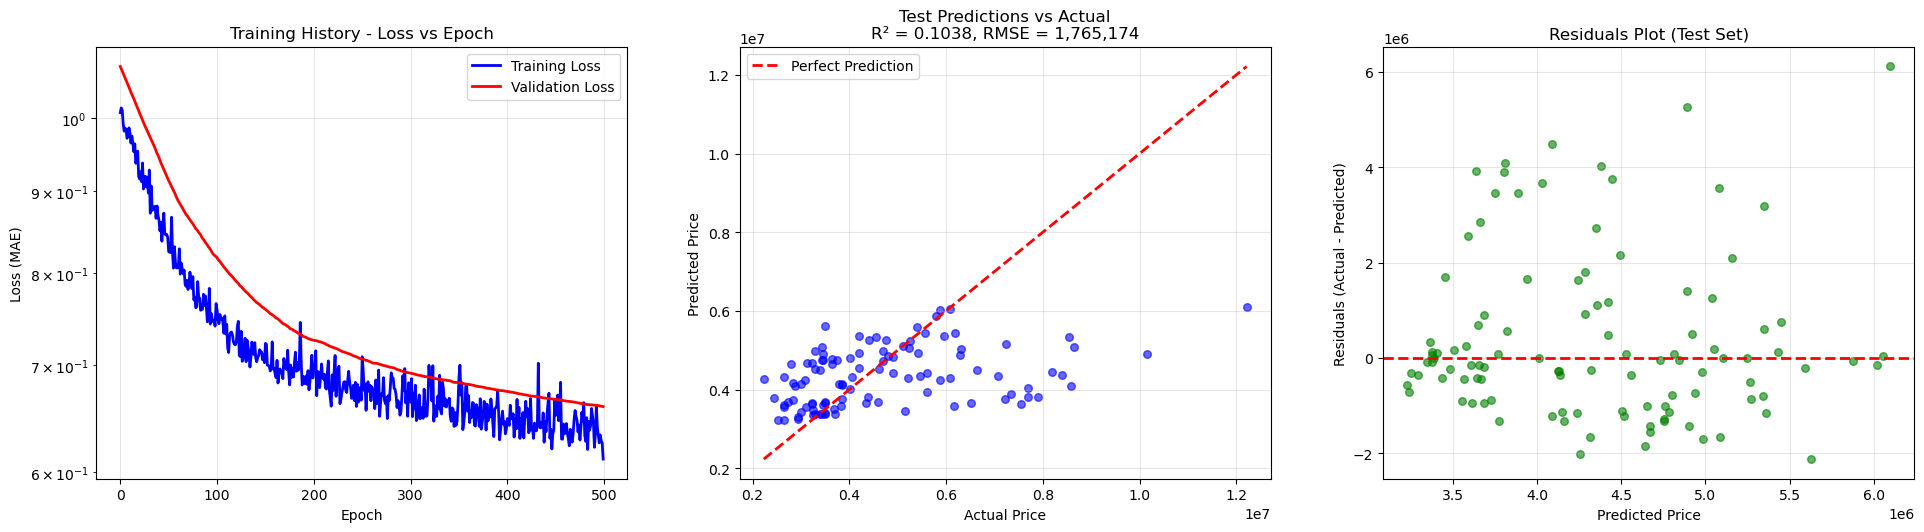


📊 RINGKASAN HASIL:
   Training Time: 4.40s
   Train R²: 0.1469
   Test R²: 0.1038
   Train RMSE: 1,707,761.49
   Test RMSE: 1,765,173.66
   Overfitting Gap: 0.0431
   Performance: Needs Improvement 📈

📗 BAB 2 — PERBANDINGAN AKTIVASI (tanh, sigmoid, relu)


🚀 [BAB 2] Activation = TANH

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: TANH
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 0.909127 | Val Loss: 0.976789 | R²: -0.2428 | MAE: 0.976789
Epoch   51/500 | Loss: 0.787392 | Val Loss: 0.859974 | R²: -0.0124 | MAE: 0.859974
Epoch  101/500 | Loss: 0.737078 | Val Loss: 0.773996 | R²: 0.1175 | MAE: 0.773996
Epoch  151/500 | Loss: 0.683774 | Val Loss: 0.711231 | R²: 0.1930 | MAE: 0.711231
Epoch  201/500 | Loss: 0.645243 | Val Loss: 0.669199 | R²: 0.2407 | MAE: 0.669199
Epoch  251/500 | Loss: 0.646100 | Val Loss: 0.639354 | R²: 0.2768 | MAE: 0.639354
Epoch  301/500 

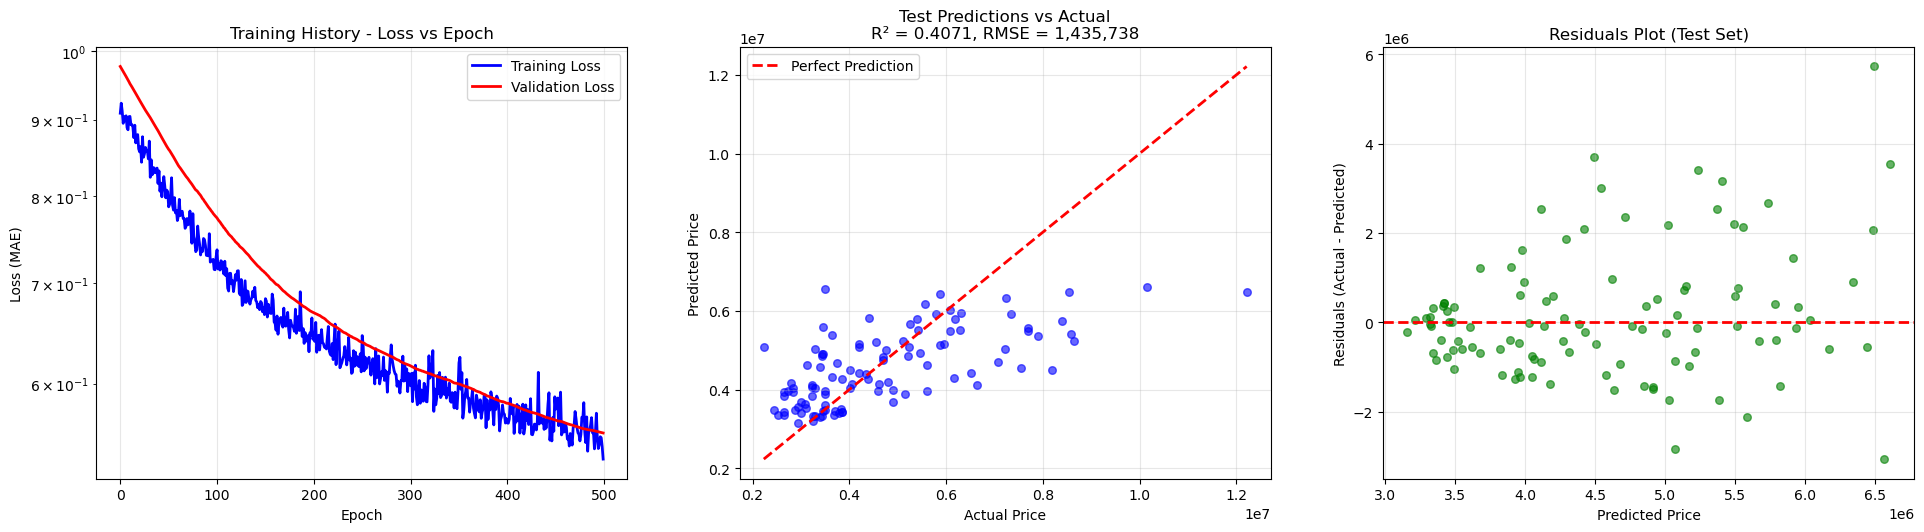


📊 RINGKASAN HASIL:
   Training Time: 3.57s
   Train R²: 0.3909
   Test R²: 0.4071
   Train RMSE: 1,442,989.99
   Test RMSE: 1,435,738.16
   Overfitting Gap: -0.0162
   Performance: Needs Improvement 📈

🚀 [BAB 2] Activation = SIGMOID

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: SIGMOID
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 0.817844 | Val Loss: 0.858003 | R²: -0.0404 | MAE: 0.858003
Epoch   51/500 | Loss: 0.769921 | Val Loss: 0.825421 | R²: -0.0019 | MAE: 0.825421
Epoch  101/500 | Loss: 0.773604 | Val Loss: 0.805493 | R²: 0.0104 | MAE: 0.805493
Epoch  151/500 | Loss: 0.759713 | Val Loss: 0.792514 | R²: 0.0106 | MAE: 0.792514
Epoch  201/500 | Loss: 0.737528 | Val Loss: 0.784525 | R²: 0.0050 | MAE: 0.784525
Epoch  251/500 | Loss: 0.765273 | Val Loss: 0.779682 | R²: -0.0022 | MAE: 0.779682
Epoch  301/500 | Loss: 0.734915 | Val Loss: 0.777212 | R²: -0.0

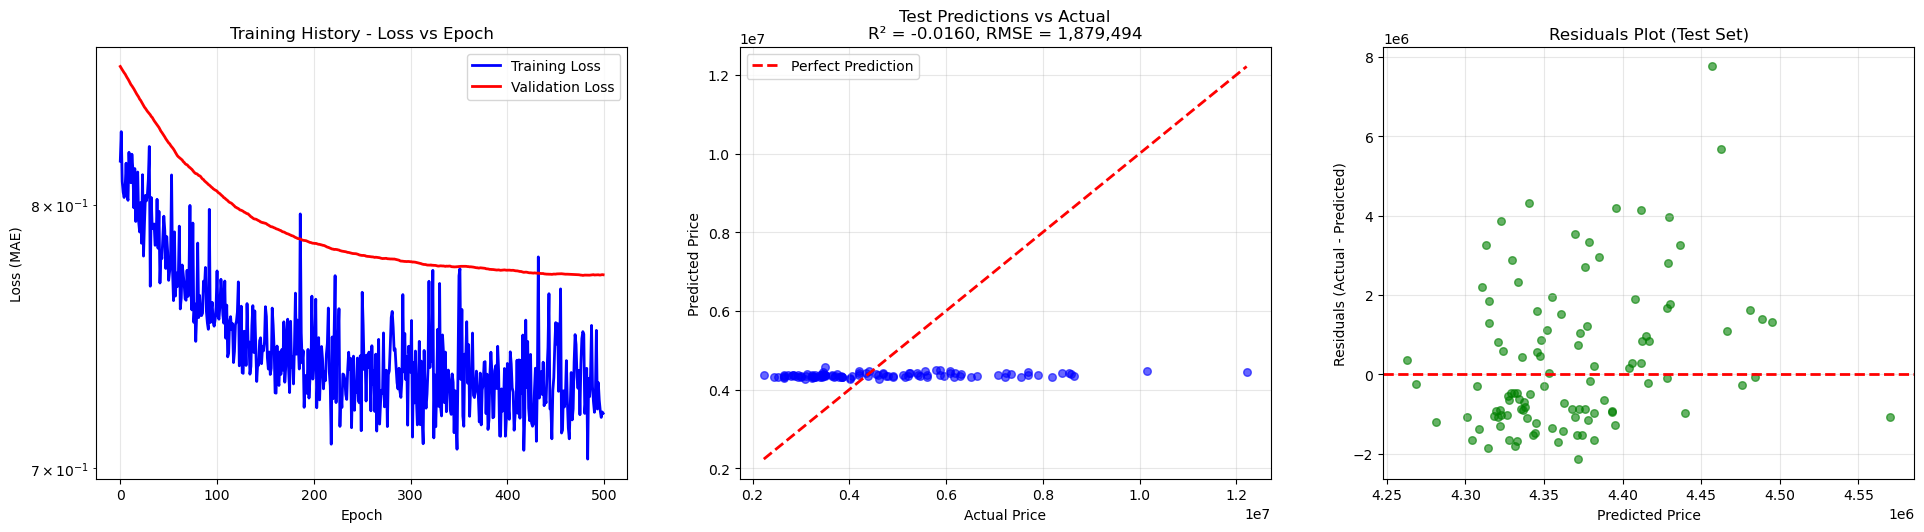


📊 RINGKASAN HASIL:
   Training Time: 4.25s
   Train R²: -0.0199
   Test R²: -0.0160
   Train RMSE: 1,867,316.71
   Test RMSE: 1,879,494.24
   Overfitting Gap: -0.0039
   Performance: Needs Improvement 📈

🚀 [BAB 2] Activation = RELU

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: RELU
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 1.008455 | Val Loss: 1.077958 | R²: -0.4375 | MAE: 1.077958
Epoch   51/500 | Loss: 0.825094 | Val Loss: 0.914183 | R²: -0.1517 | MAE: 0.914183
Epoch  101/500 | Loss: 0.758830 | Val Loss: 0.817872 | R²: -0.0493 | MAE: 0.817872
Epoch  151/500 | Loss: 0.722635 | Val Loss: 0.759060 | R²: -0.0158 | MAE: 0.759060
Epoch  201/500 | Loss: 0.697602 | Val Loss: 0.725960 | R²: -0.0023 | MAE: 0.725960
Epoch  251/500 | Loss: 0.708818 | Val Loss: 0.706442 | R²: 0.0095 | MAE: 0.706442
Epoch  301/500 | Loss: 0.663894 | Val Loss: 0.692175 | R²: 0.0254

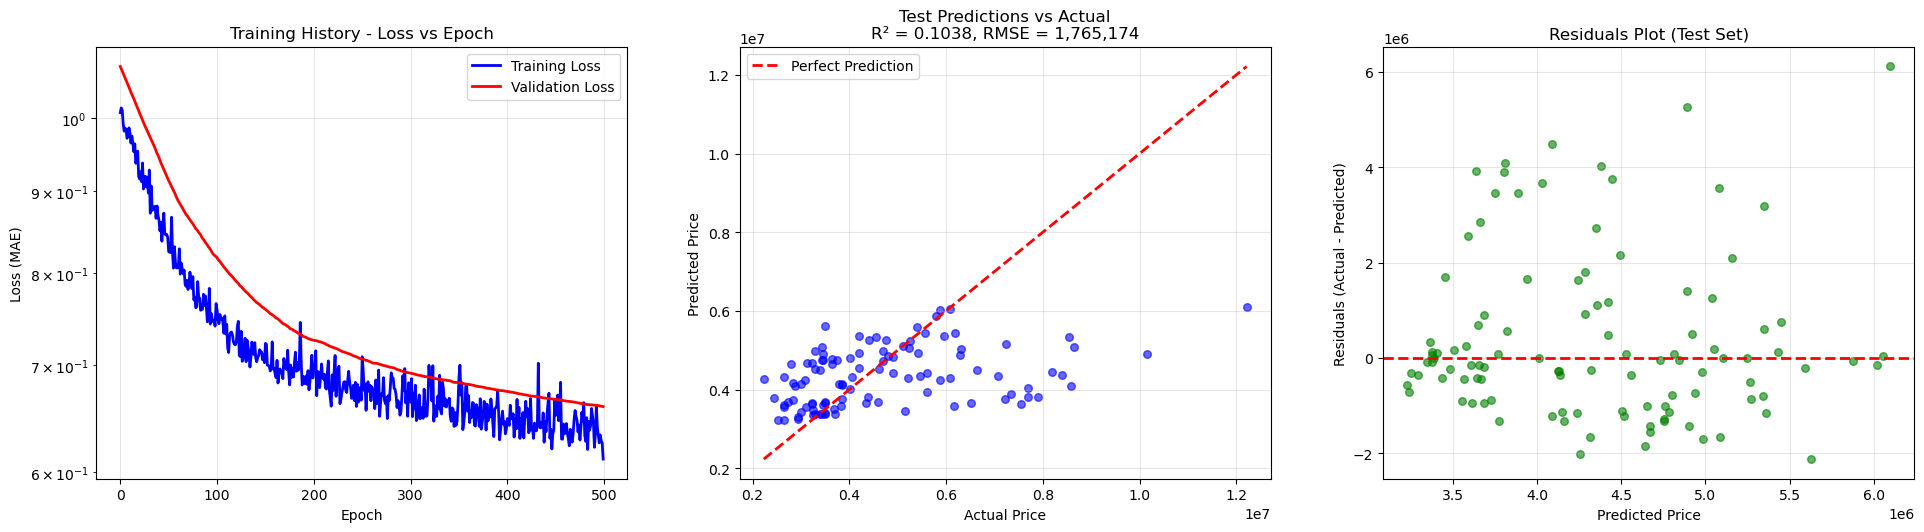


📊 RINGKASAN HASIL:
   Training Time: 3.19s
   Train R²: 0.1469
   Test R²: 0.1038
   Train RMSE: 1,707,761.49
   Test RMSE: 1,765,173.66
   Overfitting Gap: 0.0431
   Performance: Needs Improvement 📈

📙 BAB 3 — PERBANDINGAN LOSS FUNCTION (MAE vs MSE)


🚀 [BAB 3] Loss = MAE

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: RELU
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 1.008455 | Val Loss: 1.077958 | R²: -0.4375 | MAE: 1.077958
Epoch   51/500 | Loss: 0.825094 | Val Loss: 0.914183 | R²: -0.1517 | MAE: 0.914183
Epoch  101/500 | Loss: 0.758830 | Val Loss: 0.817872 | R²: -0.0493 | MAE: 0.817872
Epoch  151/500 | Loss: 0.722635 | Val Loss: 0.759060 | R²: -0.0158 | MAE: 0.759060
Epoch  201/500 | Loss: 0.697602 | Val Loss: 0.725960 | R²: -0.0023 | MAE: 0.725960
Epoch  251/500 | Loss: 0.708818 | Val Loss: 0.706442 | R²: 0.0095 | MAE: 0.706442
Epoch  301/500 | Loss: 

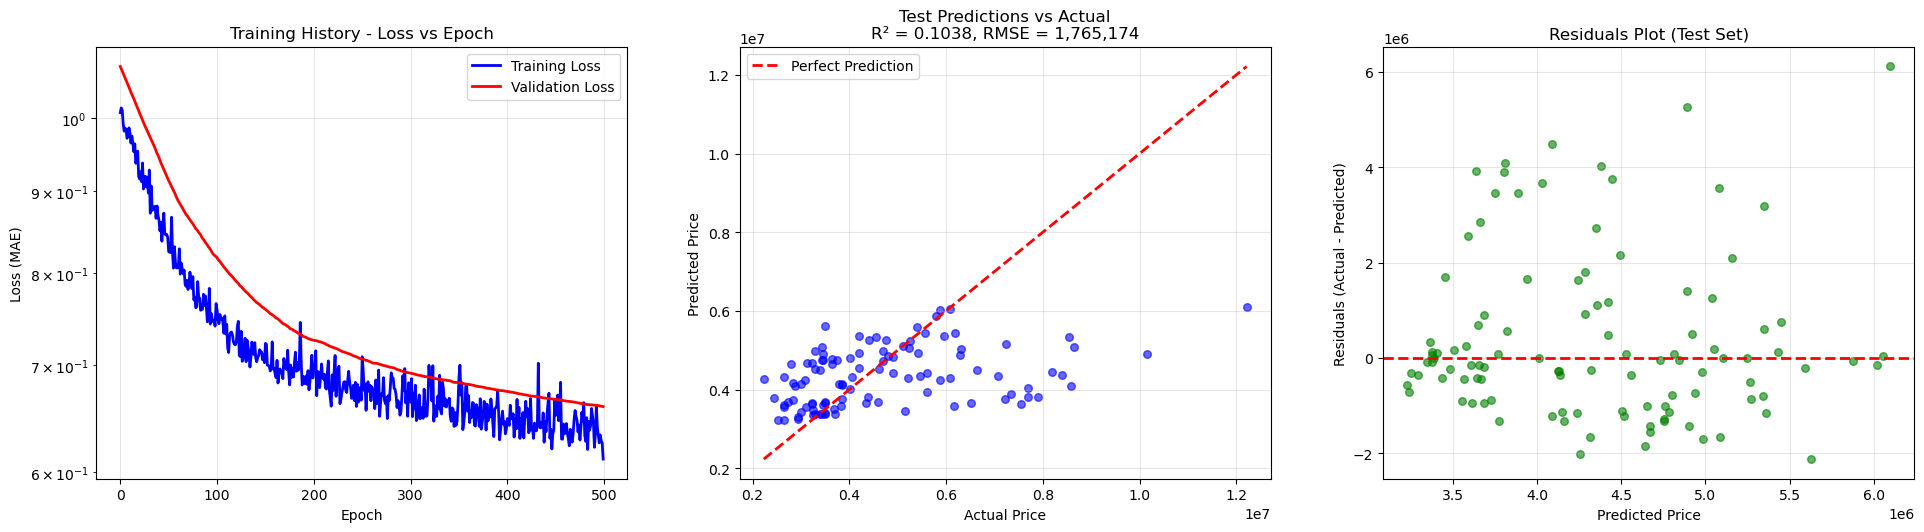


📊 RINGKASAN HASIL:
   Training Time: 3.80s
   Train R²: 0.1469
   Test R²: 0.1038
   Train RMSE: 1,707,761.49
   Test RMSE: 1,765,173.66
   Overfitting Gap: 0.0431
   Performance: Needs Improvement 📈

🚀 [BAB 3] Loss = MSE

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: RELU
   Loss: MSE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 1.349554 | Val Loss: 1.452933 | R²: -0.4287 | MAE: 1.074007
Epoch   51/500 | Loss: 0.962658 | Val Loss: 1.078202 | R²: -0.0602 | MAE: 0.854161
Epoch  101/500 | Loss: 0.914773 | Val Loss: 0.987862 | R²: 0.0286 | MAE: 0.782971
Epoch  151/500 | Loss: 0.878891 | Val Loss: 0.930603 | R²: 0.0849 | MAE: 0.744315
Epoch  201/500 | Loss: 0.804794 | Val Loss: 0.881761 | R²: 0.1330 | MAE: 0.717358
Epoch  251/500 | Loss: 0.825944 | Val Loss: 0.838583 | R²: 0.1754 | MAE: 0.693966
Epoch  301/500 | Loss: 0.714685 | Val Loss: 0.799947 | R²: 0.2134 | MAE: 0.679

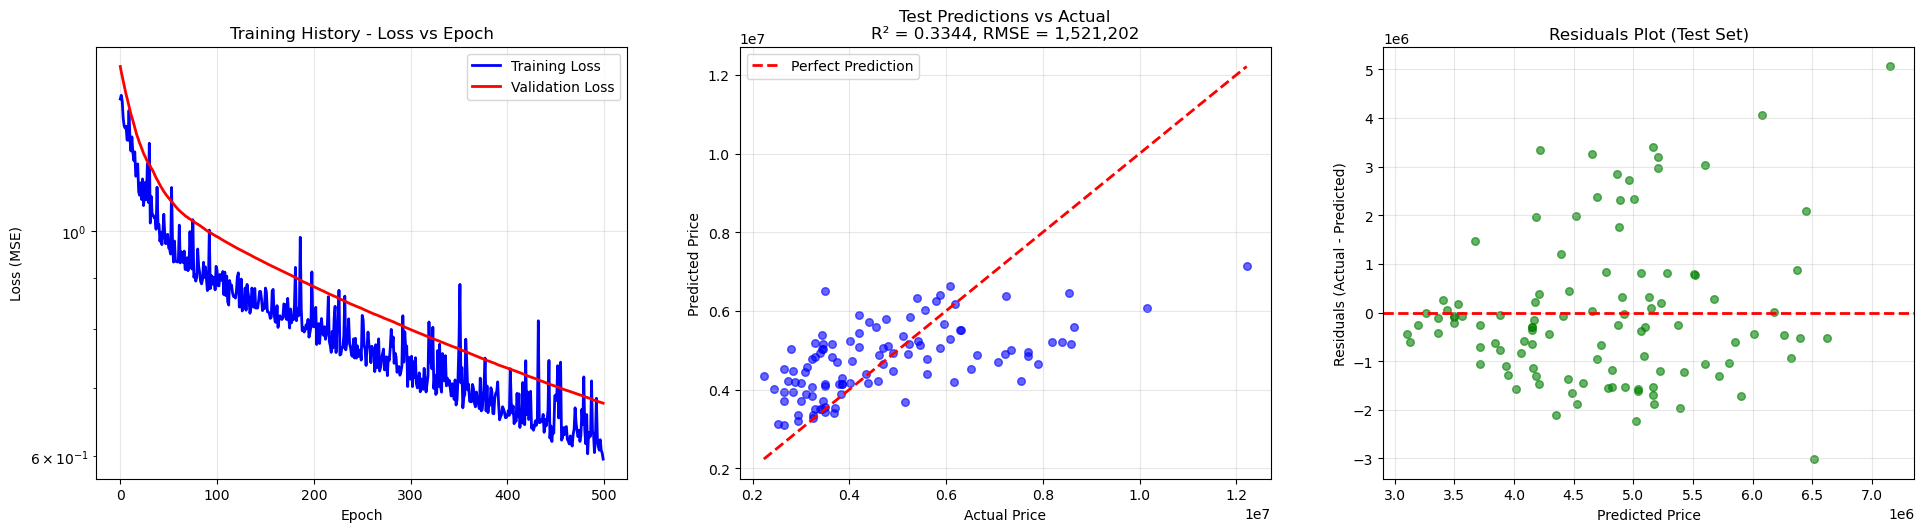


📊 RINGKASAN HASIL:
   Training Time: 4.12s
   Train R²: 0.3761
   Test R²: 0.3344
   Train RMSE: 1,460,515.80
   Test RMSE: 1,521,202.28
   Overfitting Gap: 0.0416
   Performance: Needs Improvement 📈

📒 BAB 4 — PERBANDINGAN WEIGHT INITIALIZATION (he, xavier, random)


🚀 [BAB 4] Weight Init = he

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: RELU
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 1.008455 | Val Loss: 1.077958 | R²: -0.4375 | MAE: 1.077958
Epoch   51/500 | Loss: 0.825094 | Val Loss: 0.914183 | R²: -0.1517 | MAE: 0.914183
Epoch  101/500 | Loss: 0.758830 | Val Loss: 0.817872 | R²: -0.0493 | MAE: 0.817872
Epoch  151/500 | Loss: 0.722635 | Val Loss: 0.759060 | R²: -0.0158 | MAE: 0.759060
Epoch  201/500 | Loss: 0.697602 | Val Loss: 0.725960 | R²: -0.0023 | MAE: 0.725960
Epoch  251/500 | Loss: 0.708818 | Val Loss: 0.706442 | R²: 0.0095 | MAE: 0.706442
E

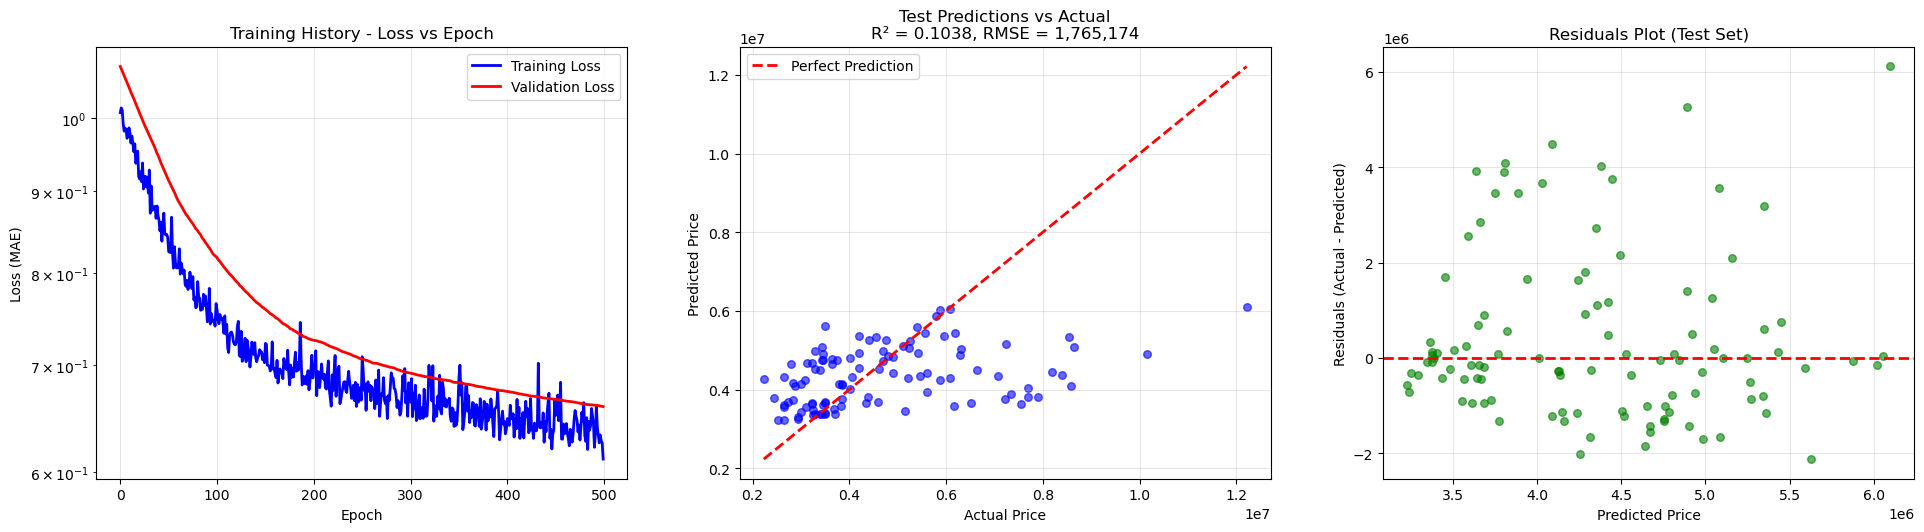


📊 RINGKASAN HASIL:
   Training Time: 3.96s
   Train R²: 0.1469
   Test R²: 0.1038
   Train RMSE: 1,707,761.49
   Test RMSE: 1,765,173.66
   Overfitting Gap: 0.0431
   Performance: Needs Improvement 📈

🚀 [BAB 4] Weight Init = xavier

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: RELU
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 1.008455 | Val Loss: 1.077958 | R²: -0.4375 | MAE: 1.077958
Epoch   51/500 | Loss: 0.825094 | Val Loss: 0.914183 | R²: -0.1517 | MAE: 0.914183
Epoch  101/500 | Loss: 0.758830 | Val Loss: 0.817872 | R²: -0.0493 | MAE: 0.817872
Epoch  151/500 | Loss: 0.722635 | Val Loss: 0.759060 | R²: -0.0158 | MAE: 0.759060
Epoch  201/500 | Loss: 0.697602 | Val Loss: 0.725960 | R²: -0.0023 | MAE: 0.725960
Epoch  251/500 | Loss: 0.708818 | Val Loss: 0.706442 | R²: 0.0095 | MAE: 0.706442
Epoch  301/500 | Loss: 0.663894 | Val Loss: 0.692175 | R²: 0.0254

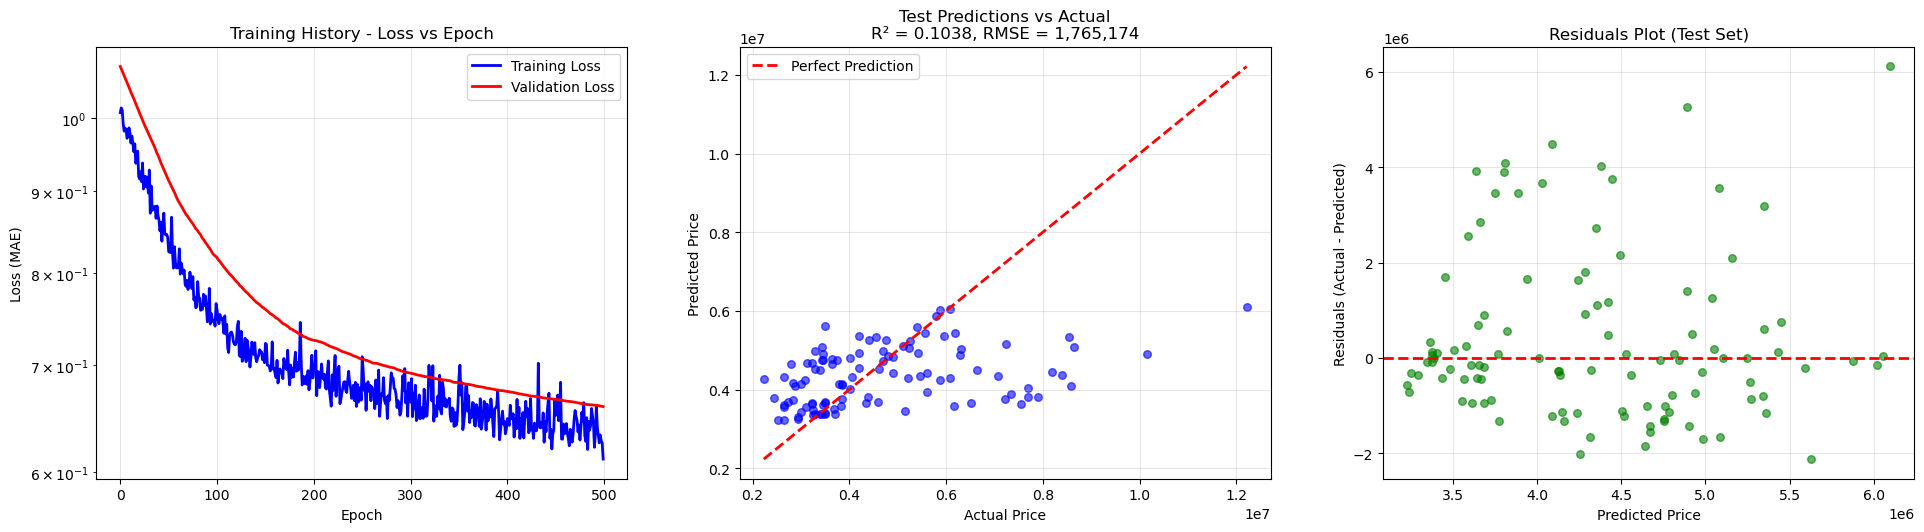


📊 RINGKASAN HASIL:
   Training Time: 3.60s
   Train R²: 0.1469
   Test R²: 0.1038
   Train RMSE: 1,707,761.49
   Test RMSE: 1,765,173.66
   Overfitting Gap: 0.0431
   Performance: Needs Improvement 📈

🚀 [BAB 4] Weight Init = random

📈 VISUALISASI TRAINING HISTORY DAN PREDIKSI
Menggunakan konfigurasi terbaik:
   Architecture: 15 -> 64 -> 32 -> 1
   Activation: RELU
   Loss: MAE
   Learning Rate: 0.001
   Batch Size: 32
   Epochs: 500
Epoch    1/500 | Loss: 1.008455 | Val Loss: 1.077958 | R²: -0.4375 | MAE: 1.077958
Epoch   51/500 | Loss: 0.825094 | Val Loss: 0.914183 | R²: -0.1517 | MAE: 0.914183
Epoch  101/500 | Loss: 0.758830 | Val Loss: 0.817872 | R²: -0.0493 | MAE: 0.817872
Epoch  151/500 | Loss: 0.722635 | Val Loss: 0.759060 | R²: -0.0158 | MAE: 0.759060
Epoch  201/500 | Loss: 0.697602 | Val Loss: 0.725960 | R²: -0.0023 | MAE: 0.725960
Epoch  251/500 | Loss: 0.708818 | Val Loss: 0.706442 | R²: 0.0095 | MAE: 0.706442
Epoch  301/500 | Loss: 0.663894 | Val Loss: 0.692175 | R²: 0.0254

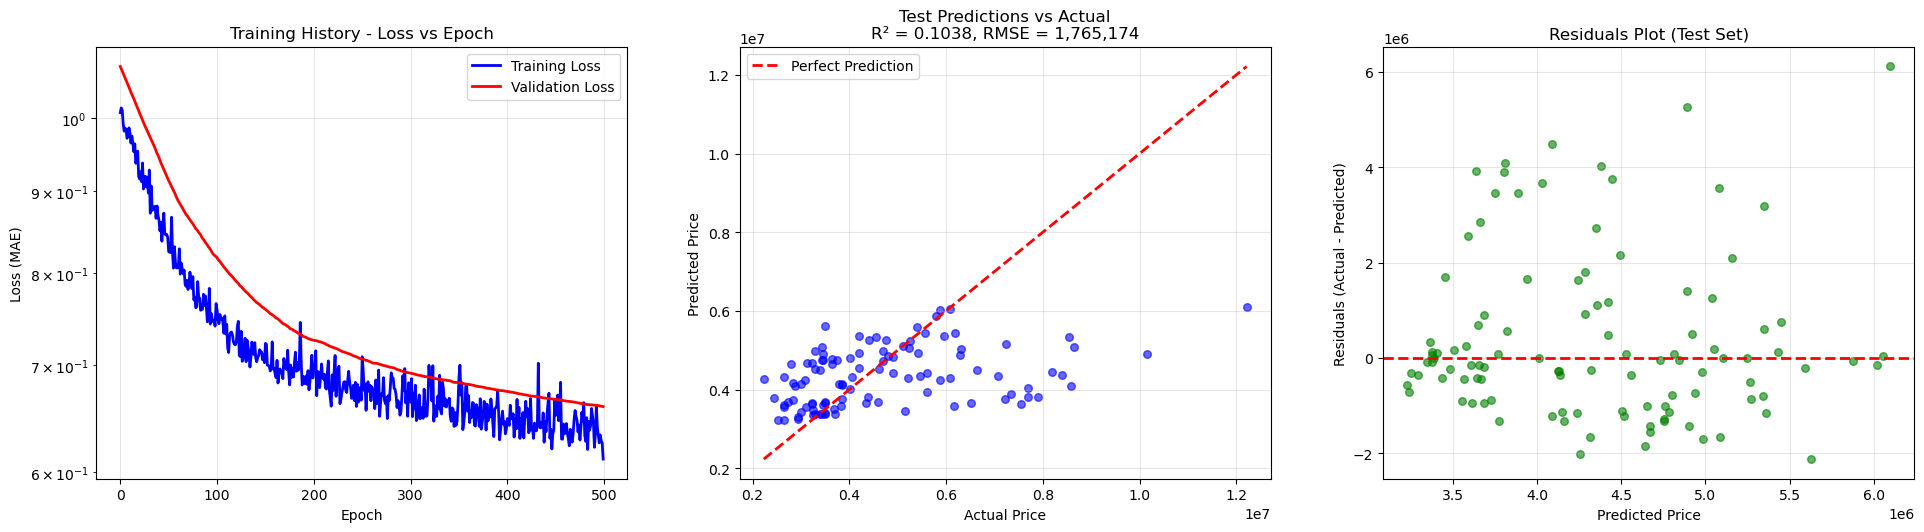


📊 RINGKASAN HASIL:
   Training Time: 3.63s
   Train R²: 0.1469
   Test R²: 0.1038
   Train RMSE: 1,707,761.49
   Test RMSE: 1,765,173.66
   Overfitting Gap: 0.0431
   Performance: Needs Improvement 📈

📈 Membuat plot loss vs epoch gabungan...



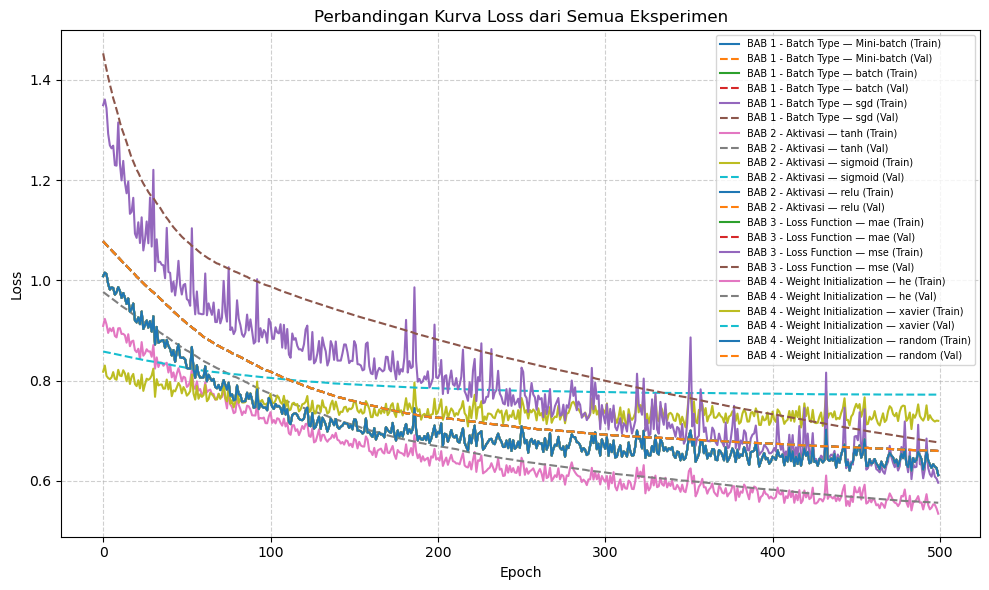


💾 Hasil eksperimen tersimpan ke 'grouped_visualization_experiments.csv'


In [39]:
# ======================================================
# EXPERIMENT RUNNER TERSTRUKTUR (Berdasarkan Bab)
# ======================================================

def run_visualization_experiments_grouped(Train_X_norm_np, Test_X_norm_np, Train_Y, Test_Y, use_target_scaling=True):
    import pandas as pd
    import numpy as np
    import time

    all_results = []
    all_loss_histories = []

    # --------------------------------------------------
    # BAB 1: Perbandingan batch 
    # --------------------------------------------------
    print("\n📘 BAB 1 — Perbandingan batch \n")
    activations = ['relu']
    losses = ['mae']
    weight_inits = ['he']
    epochs_list = [500]
    batch_type = ['Mini-batch', 'batch', 'sgd']

    exp_num = 1
    for batch_type in batch_type:
        print(f"\n🚀 [BAB 1] Batch Type = {batch_type.upper()}")
        config = {
            'activation': activations[0],
            'loss': losses[0],
            'lr': 0.001,
            'architecture': [64, 32],
            'epochs': epochs_list[0],
            'batch_size': 32,
            'type': batch_type,
            'weight_init': weight_inits[0]
        }

        try:
            trained_model, perf = visualize_training_history_and_predictions(
                Train_X_norm_np, Test_X_norm_np, Train_Y, Test_Y,
                best_config=config, use_target_scaling=use_target_scaling
            )
            all_results.append({
                'bab': 'BAB 1 - Batch Type',
                'activation': activations[0],
                'loss': losses[0],
                'weight_init': weight_inits[0],
                'epochs': epochs_list[0],
                'batch_type': batch_type,
                **perf
            })
            all_loss_histories.append({
                'bab': 'BAB 1 - Batch Type',
                'label': f"{batch_type}",
                'train_loss': perf['history']['loss'],
                'val_loss': perf['history']['val_loss']
            })
        except Exception as e:
            print(f"❌ Error BAB 1: {e}")


    # --------------------------------------------------
    # BAB 2: Activation Function
    # --------------------------------------------------
    print("\n📗 BAB 2 — PERBANDINGAN AKTIVASI (tanh, sigmoid, relu)\n")
    activations = ['tanh', 'sigmoid', 'relu']
    batch_type = 'Mini-batch'
    loss = 'mae'
    weight_init = 'he'
    epoch = 500

    for activation in activations:
        print(f"\n🚀 [BAB 2] Activation = {activation.upper()}")
        config = {
            'activation': activation,
            'loss': loss,
            'lr': 0.001,
            'architecture': [64, 32],
            'epochs': epoch,
            'batch_size': 32,
            'type': batch_type,
            'weight_init': weight_init
        }

        try:
            trained_model, perf = visualize_training_history_and_predictions(
                Train_X_norm_np, Test_X_norm_np, Train_Y, Test_Y,
                best_config=config, use_target_scaling=use_target_scaling
            )
            all_results.append({
                'bab': 'BAB 2 - Aktivasi',
                'activation': activation,
                'loss': loss,
                'weight_init': weight_init,
                'epochs': epoch,
                'batch_type': batch_type,
                **perf
            })
            all_loss_histories.append({
                'bab': 'BAB 2 - Aktivasi',
                'label': f"{activation}",
                'train_loss': perf['history']['loss'],
                'val_loss': perf['history']['val_loss']
            })
        except Exception as e:
            print(f"❌ Error BAB 2: {e}")

    # --------------------------------------------------
    # BAB 3: Loss Function
    # --------------------------------------------------
    print("\n📙 BAB 3 — PERBANDINGAN LOSS FUNCTION (MAE vs MSE)\n")
    losses = ['mae', 'mse']
    activation = 'relu'
    batch_type = 'Mini-batch'
    weight_init = 'he'
    epoch = 500

    for loss in losses:
        print(f"\n🚀 [BAB 3] Loss = {loss.upper()}")
        config = {
            'activation': activation,
            'loss': loss,
            'lr': 0.001,
            'architecture': [64, 32],
            'epochs': epoch,
            'batch_size': 32,
            'type': batch_type,
            'weight_init': weight_init
        }

        try:
            trained_model, perf = visualize_training_history_and_predictions(
                Train_X_norm_np, Test_X_norm_np, Train_Y, Test_Y,
                best_config=config, use_target_scaling=use_target_scaling
            )
            all_results.append({
                'bab': 'BAB 3 - Loss Function',
                'activation': activation,
                'loss': loss,
                'weight_init': weight_init,
                'epochs': epoch,
                'batch_type': batch_type,
                **perf
            })
            all_loss_histories.append({
                'bab': 'BAB 3 - Loss Function',
                'label': f"{loss}",
                'train_loss': perf['history']['loss'],
                'val_loss': perf['history']['val_loss']
            })
        except Exception as e:
            print(f"❌ Error BAB 3: {e}")

    # --------------------------------------------------
    # BAB 4: Weight Initialization
    # --------------------------------------------------
    print("\n📒 BAB 4 — PERBANDINGAN WEIGHT INITIALIZATION (he, xavier, random)\n")
    weight_inits = ['he', 'xavier', 'random']
    activation = 'relu'
    loss = 'mae'
    batch_type = 'Mini-batch'
    epoch = 500

    for weight_init in weight_inits:
        print(f"\n🚀 [BAB 4] Weight Init = {weight_init}")
        config = {
            'activation': activation,
            'loss': loss,
            'lr': 0.001,
            'architecture': [64, 32],
            'epochs': epoch,
            'batch_size': 32,
            'type': batch_type,
            'weight_init': weight_init
        }

        try:
            trained_model, perf = visualize_training_history_and_predictions(
                Train_X_norm_np, Test_X_norm_np, Train_Y, Test_Y,
                best_config=config, use_target_scaling=use_target_scaling
            )
            all_results.append({
                'bab': 'BAB 4 - Weight Initialization',
                'activation': activation,
                'loss': loss,
                'weight_init': weight_init,
                'epochs': epoch,
                'batch_type': batch_type,
                **perf
            })
            all_loss_histories.append({
                'bab': 'BAB 4 - Weight Initialization',
                'label': f"{weight_init}",
                'train_loss': perf['history']['loss'],
                'val_loss': perf['history']['val_loss']
            })
        except Exception as e:
            print(f"❌ Error BAB 4: {e}")

    # --------------------------------------------------
    # Simpan hasil
    # --------------------------------------------------
    print("\n📈 Membuat plot loss vs epoch gabungan...\n")

    plt.figure(figsize=(10, 6))
    for exp in all_loss_histories:
        plt.plot(exp['train_loss'], label=f"{exp['bab']} — {exp['label']} (Train)")
        if len(exp['val_loss']) > 0:
            plt.plot(exp['val_loss'], linestyle='--', label=f"{exp['bab']} — {exp['label']} (Val)")

    plt.title("Perbandingan Kurva Loss dari Semua Eksperimen")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(fontsize=7)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    return results_df


# ======================================================
# JALANKAN SEMUA EKSPERIMEN TERSTRUKTUR
# ======================================================

results_df = run_visualization_experiments_grouped(
    Train_X_norm_np, Test_X_norm_np, Train_Y, Test_Y,
    use_target_scaling=True
)

results_df.to_csv("grouped_visualization_experiments.csv", index=False)
print("\n💾 Hasil eksperimen tersimpan ke 'grouped_visualization_experiments.csv'")


In [41]:
results_df

,bab,activation,loss,weight_init,epochs,batch_type,train_r2,test_r2,train_rmse,test_rmse,training_time,overfitting_gap
0,BAB 1 - Variabel Kontrol,tanh,mae,xavier,2000,Mini-batch,0.584963,0.618482,1.191184e+06,1.151724e+06,8.165427,-0.033519
1,BAB 1 - Variabel Kontrol,tanh,mae,he,2000,Mini-batch,0.584963,0.618482,1.191184e+06,1.151724e+06,8.446348,-0.033519
2,BAB 1 - Variabel Kontrol,relu,mae,he,2000,Mini-batch,0.449788,0.438593,1.371515e+06,1.397108e+06,7.551207,0.011195
3,BAB 1 - Variabel Kontrol,relu,mae,xavier,2000,Mini-batch,0.449788,0.438593,1.371515e+06,1.397108e+06,7.260697,0.011195
4,BAB 1 - Variabel Kontrol,tanh,mae,he,500,Mini-batch,0.390946,0.407118,1.442990e+06,1.435738e+06,2.179842,-0.016172
5,BAB 1 - Variabel Kontrol,tanh,mae,xavier,500,Mini-batch,0.390946,0.407118,1.442990e+06,1.435738e+06,2.340737,-0.016172
6,BAB 2 - Aktivasi,tanh,mae,he,500,Mini-batch,0.390946,0.407118,1.442990e+06,1.435738e+06,1.984327,-0.016172
7,BAB 3 - Loss Function,relu,mse,he,500,Mini-batch,0.376062,0.334433,1.460516e+06,1.521202e+06,1.666953,0.041629
8,BAB 1 - Variabel Kontrol,relu,mae,he,500,Mini-batch,0.146933,0.103826,1.707761e+06,1.765174e+06,1.925799,0.043107
9,BAB 1 - Variabel Kontrol,relu,mae,xavier,500,Mini-batch,0.146933,0.103826,1.707761e+06,1.765174e+06,2.017662,0.043107
